# LDA 적용하기

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
#Scaling features
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

# PCA와 유사하게 축소할 Components 수를 지정하자.
lda = LinearDiscriminantAnalysis(n_components=2)
# LDA는 특이하게 fit 함수를 호출 시 종속변수(y값)을 넣어준다.
# 왜냐하면 클래스를 최대한 잘 분류할 수 있는 축을 찾아내기 위함이다.
# 그래서 종속변수값을 알고 있는 상태에서 모델링이 진행되기 때문에 지도학습 분류문제에 사용된다.
lda.fit(iris_scaled, iris.target)

# Scaling된 feature를 LDA활용해 차원축소시키기
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


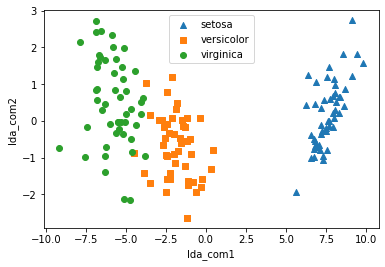

In [9]:
# 차원 축소시킨 후 데이터들의 산포도 살펴보기
import pandas as pd
import matplotlib.pyplot as plt

lda_columns = ['lda_com1', 'lda_com2']
iris_df = pd.DataFrame(data=iris_lda, columns=lda_columns)
iris_df['target'] = iris.target

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target']==i]['lda_com1']
    y_axis_data = iris_df[iris_df['target']==i]['lda_com2']
    plt.scatter(x=x_axis_data, y=y_axis_data, marker=marker,
               label=iris.target_names[i])

plt.legend()
plt.xlabel('lda_com1')
plt.ylabel('lda_com2')
plt.show()

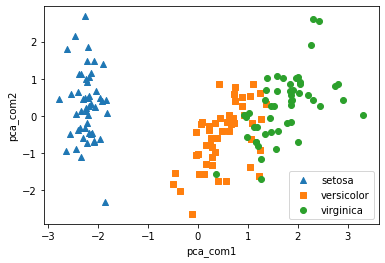

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns=columns)
iris_df['target'] = iris.target

iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
pca_cols = ['pca_com1', 'pca_com2']
iris_pca_df = pd.DataFrame(data=iris_pca, columns=pca_cols)
iris_pca_df['target'] = iris_df['target']

markers = ['^', 's', 'o']
for i, marker in enumerate(markers):
    x_axis_data = iris_pca_df[iris_pca_df['target']==i]['pca_com1']
    y_axis_data = iris_pca_df[iris_pca_df['target']==i]['pca_com2']
    plt.scatter(x=x_axis_data, y=y_axis_data, marker=marker,
              label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_com1')
plt.ylabel('pca_com2')
plt.show()

# SVD 적용하기

- SVD를 지원하는 여러가지 라이브러리가 있다
    * numpy
    * scipy
    * Scikit-learn

In [19]:
# numpy의 svd 모듈
import numpy as np
from numpy.linalg import svd

# 4 by 4 행렬생성
np.random.seed(42)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[ 0.497 -0.138  0.648  1.523]
 [-0.234 -0.234  1.579  0.767]
 [-0.469  0.543 -0.463 -0.466]
 [ 0.242 -1.913 -1.725 -0.562]]


In [20]:
# 반환된 분해된 행렬 확인해보기
# 디폴트 SVD는 Full SVD임
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix \n', np.round(U,3))
# Sigma 행렬은 1차원으로 도출되는데 이는 0이아닌 대각행렬의 요소값을 제외한 0값들은 출력을 안하기 때문.
print('Sigma matrix \n', np.round(Sigma, 3))
print('Vt matrix \n', np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix 
 [[-0.373 -0.598  0.642 -0.302]
 [-0.488 -0.35  -0.745 -0.289]
 [ 0.113  0.444  0.062 -0.887]
 [ 0.781 -0.568 -0.168 -0.197]]
Sigma matrix 
 [3.08  1.926 0.92  0.342]
Vt matrix 
 [[ 0.021 -0.412 -0.783 -0.466]
 [-0.291  0.775 -0.086 -0.554]
 [ 0.461  0.479 -0.544  0.512]
 [ 0.838  0.017  0.289 -0.462]]


In [21]:
# 분해된 행렬 다시 원상복구해보기
# Sigma 행렬의 대각요소 제외한 0부분 다시 원상복구 시키기
Sigma_mat = np.diag(Sigma)
# np.dot은 행렬끼리 내적시키는 연산
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[ 0.497 -0.138  0.648  1.523]
 [-0.234 -0.234  1.579  0.767]
 [-0.469  0.543 -0.463 -0.466]
 [ 0.242 -1.913 -1.725 -0.562]]


In [22]:
# Compact SVD 수행해보기
# 데이터 의존도가 서로 존재하는 행렬 임의로 생성
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[ 0.497 -0.138  0.648  1.523]
 [-0.234 -0.234  1.579  0.767]
 [ 0.263 -0.372  2.227  2.29 ]
 [ 0.497 -0.138  0.648  1.523]]


In [23]:
# SVD 분할 수행
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print(np.round(Sigma, 3))

(4, 4) (4,) (4, 4)
[4.266 1.19  0.    0.   ]


In [24]:
# 분할 후 다시 복원
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)

a_ = np.dot(np.dot(U_, Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[ 0.497 -0.138  0.648  1.523]
 [-0.234 -0.234  1.579  0.767]
 [ 0.263 -0.372  2.227  2.29 ]
 [ 0.497 -0.138  0.648  1.523]]


In [30]:
# Truncated SVD 수행하기
# Truncated SVD는 Scipy의 spares의 svds 사용
# 일반 SVD는 
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

np.random.seed(12)
matrix = np.random.random((6,6))
print('원본 행렬\n', np.round(matrix,3))
# full_matrices=True면 U를 (M,M) Vt를 (N,N)으로 분할하고
# full_matrices=False면 U를 (M,k) Vt를 (k,N)으로 분할한다.
# 이 때, k= M,N 중 최소값임.
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('분해 행렬 차원', U.shape, Sigma.shape, Vt.shape)
print('Sigma값', np.round(Sigma,3))

# Truncated SVD
# 특이값(대각행렬의 대각값들) 몇개로 할지 사전정의.
num_comp=4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_comp)
print('Truncated SVD 적용 후 행렬차원',U_tr.shape,Sigma_tr.shape,
     Vt_tr.shape)
print('Truncated SVD 적용 후 특이값', np.round(Sigma_tr, 3))
# 다시 원본 행렬로 복구 시도해보기
matrix_tr = np.dot(np.dot(U_tr, np.diag(Sigma_tr)), Vt_tr)

print('원본 행렬 복구 시도한 행렬', np.round(matrix_tr, 3))

원본 행렬
 [[0.154 0.74  0.263 0.534 0.015 0.919]
 [0.901 0.033 0.957 0.137 0.284 0.606]
 [0.944 0.853 0.002 0.521 0.552 0.485]
 [0.768 0.161 0.765 0.021 0.135 0.116]
 [0.31  0.671 0.471 0.816 0.29  0.733]
 [0.703 0.328 0.335 0.978 0.625 0.95 ]]
분해 행렬 차원 (6, 6) (6,) (6, 6)
Sigma값 [3.145 1.289 0.799 0.603 0.301 0.058]
Truncated SVD 적용 후 행렬차원 (6, 4) (4,) (4, 6)
Truncated SVD 적용 후 특이값 [0.603 0.799 1.289 3.145]
원본 행렬 복구 시도한 행렬 [[ 0.119  0.768  0.32   0.599  0.042  0.828]
 [ 0.888  0.049  0.997  0.211  0.274  0.525]
 [ 0.94   0.858  0.016  0.546  0.549  0.458]
 [ 0.779  0.146  0.725 -0.056  0.149  0.198]
 [ 0.364  0.629  0.383  0.714  0.249  0.874]
 [ 0.691  0.334  0.345  0.978  0.642  0.941]]


Text(0, 0.5, 'Comp2')

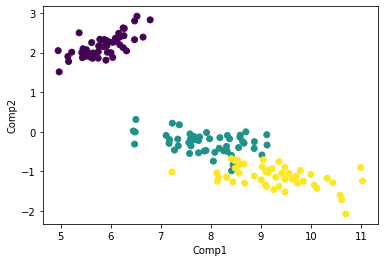

In [31]:
# Scikit-learn에서 제공하는 Truncated SVD이용
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_features = iris.data
# 2개의 특이값으로 분할
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_features)
iris_tsvd = tsvd.transform(iris_features)

# 분할 후 데이터 산포도 시각화
plt.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
plt.xlabel('Comp1')
plt.ylabel('Comp2')

Text(0.5, 1.0, 'PCA')

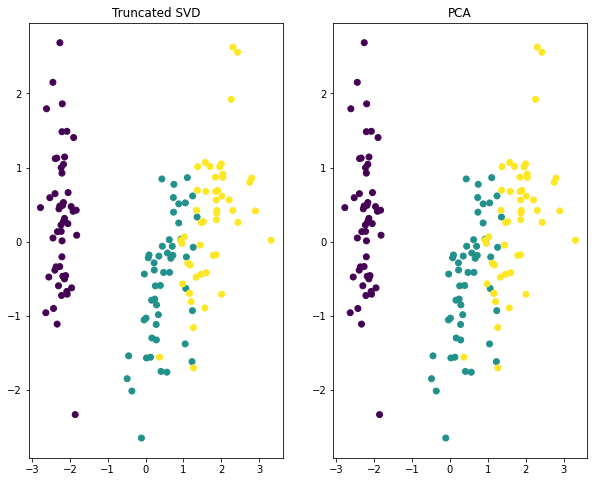

In [33]:
# PCA와 Truncated SVD는 비슷한 효과를 보여준다.
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_features)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# PCA와 Truncated SVD 적용 후 각각 데이터 산포도 비교
fig, (ax1, ax2) = plt.subplots(figsize=(10,8), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y=iris_tsvd[:,1], c=iris.target)
ax2.scatter(x=iris_pca[:,0], y=iris_pca[:, 1], c=iris.target)
ax1.set_title('Truncated SVD')
ax2.set_title('PCA')

/Users/younghun/opt/anaconda3/envs/venvforpython/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1077: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  " improve convergence." % max_iter, ConvergenceWarning)


Text(0, 0.5, 'NMF comp2')

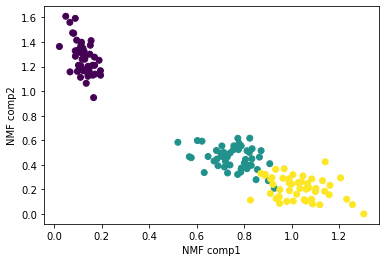

In [35]:
# NMF(Non-negative Matrix Factorization)
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()
iris_features = iris.data
nmf = NMF(n_components=2)

iris_nmf = nmf.fit_transform(iris_features)

plt.scatter(x=iris_nmf[:,0], y=iris_nmf[:,1],
           c=iris.target)
plt.xlabel('NMF comp1')
plt.ylabel('NMF comp2')